In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


data = pd.read_csv('data/data3lab.csv', delimiter=" ")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

renamedData = data.rename({
                          '3:Temperature_Comedor_Sensor': 'температура на кухне',
                          '4:Temperature_Habitacion_Sensor': 'температура в комнате',
                          '5:Weather_Temperature': 'прогноз',
                          '6:CO2_Comedor_Sensor': 'СО2 на кухне',
                          '7:CO2_Habitacion_Sensor': 'СО2 в комнате',
                          '8:Humedad_Comedor_Sensor': 'влажность на кухне',
                          '9:Humedad_Habitacion_Sensor': 'влажность в комнате',
                          '10:Lighting_Comedor_Sensor': 'освещение на кухне',
                          '11:Lighting_Habitacion_Sensor': 'освещение в комнате',
                          '22:Temperature_Exterior_Sensor': 'температура на улице',
                          '23:Humedad_Exterior_Sensor': 'влажность на улице',
    
                          }, axis='columns')
columns = ["температура на кухне", "температура в комнате", "прогноз", "СО2 на кухне", "СО2 в комнате", "влажность на кухне", "влажность в комнате", "освещение на кухне", "освещение в комнате", "температура на улице", "влажность на улице"]




In [2]:
x = renamedData[['температура на кухне', 'температура в комнате', 'прогноз']]
y = renamedData[['температура на улице']]
def splitData(x, y, train_size):
    random = np.random.randn(len(x))
    mask = random < np.percentile(random, train_size * 100)
    trainX, testX, trainY, testY = x[mask], x[~mask], y[mask], y[~mask]
    return trainX, testX, trainY, testY

xTrain, xTest, yTrain, yTest = splitData(x, y, 0.67)

model = linear_model.LinearRegression()
model.fit(xTrain, yTrain)
prediction = model.predict(xTest)


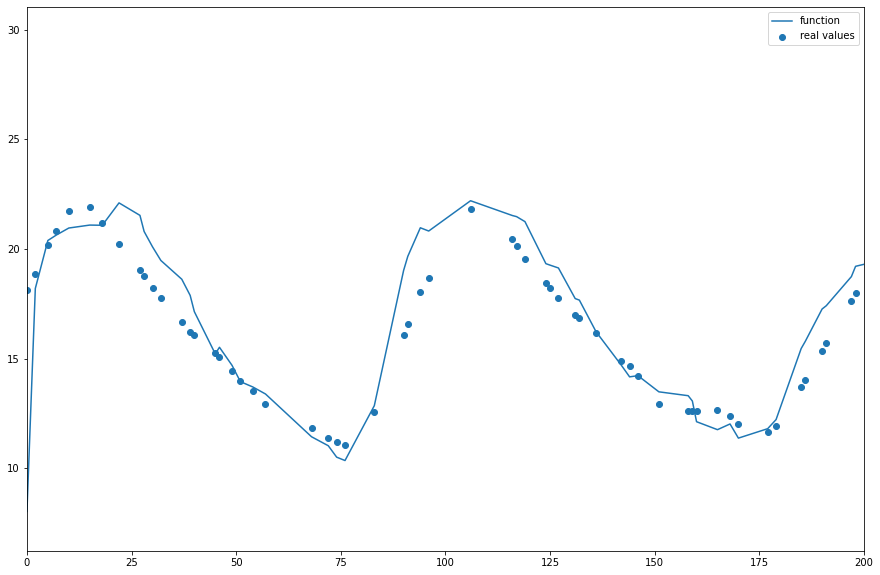

Mean squared error: 1.87
Coefficient of determination: 0.90


In [3]:
plt.figure(figsize=(15, 10))
plt.scatter(xTest.index, yTest['температура на улице'], label="real values")
plt.plot(xTest.index, prediction, label="function")
plt.legend()
plt.xlim((0, 200))
plt.show()
print("Mean squared error: %.2f" % mean_squared_error(yTest, prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(yTest, prediction))

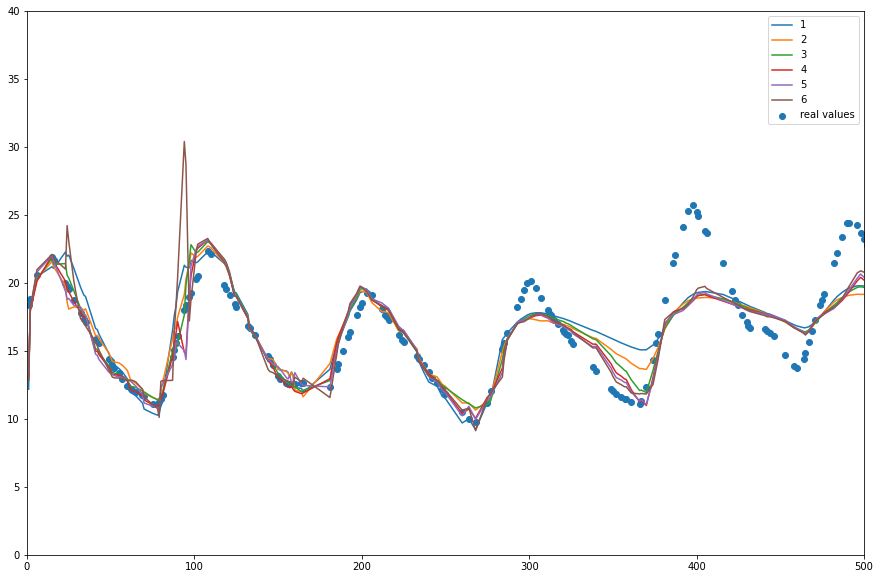

In [4]:
#  xTrain, xTest, yTrain, yTest = splitData(x, y, 0.67)


from sklearn.model_selection import cross_val_score
plt.figure(figsize=(15, 10))

plt.xlim((0, 500))
plt.ylim((0, 40))
xTrain, xTest, yTrain, yTest = splitData(x, y, 0.67)

degrees = [1, 2, 3, 4, 5, 6]
scores = []
errors = []

plt.scatter(xTest.index, yTest['температура на улице'])
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = linear_model.LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression),])
    pipeline.fit(xTrain, yTrain)
    
    scores.append(r2_score(yTest, prediction))
    
    errors.append(mean_squared_error(yTest, prediction))
    
    prediction = pipeline.predict(xTest)
    
    plt.plot(xTest.index, prediction)
    
    
plt.legend([*degrees, "real values"])
plt.show()

In [5]:
result = pd.DataFrame({"degree": degrees, "score": scores, "error": errors})
print(result)

   degree     score      error
0       1 -0.386979  25.037283
1       2  0.906715   1.683958
2       3  0.920076   1.442762
3       4  0.930075   1.262270
4       5  0.932110   1.225534
5       6  0.934479   1.182755


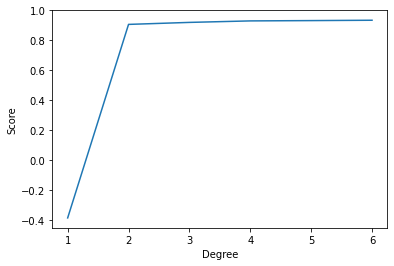

In [6]:

plt.plot(result["degree"], result["score"])
plt.xlabel("Degree")
plt.ylabel("Score")
plt.show()

In [17]:

degrees = [1, 2, 3, 4, 5, 6, 7, 8]
scores = []
errors = []

for i in range(len(degrees)):
    features = PolynomialFeatures(degrees[i], include_bias=False)
    model = Ridge(alpha=0.01)
    pipeline = Pipeline([("Features", features), ("Regression model", model)])
    pipeline.fit(xTrain, yTrain)
    
    prediction = pipeline.predict(xTest)
    scores.append(r2_score(yTest, prediction))
    errors.append(mean_squared_error(yTest, prediction))  

result = pd.DataFrame({"degrees": degrees, "score": scores, "error": errors})
print(result)

c:\users\руслан\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.74431e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


   degrees     score     error
0        1  0.906715  1.683956
1        2  0.920081  1.442667
2        3  0.929935  1.264788
3        4  0.932022  1.227114
4        5  0.933255  1.204856
5        6  0.929134  1.279244
6        7  0.925545  1.344045
7        8  0.823613  3.184088


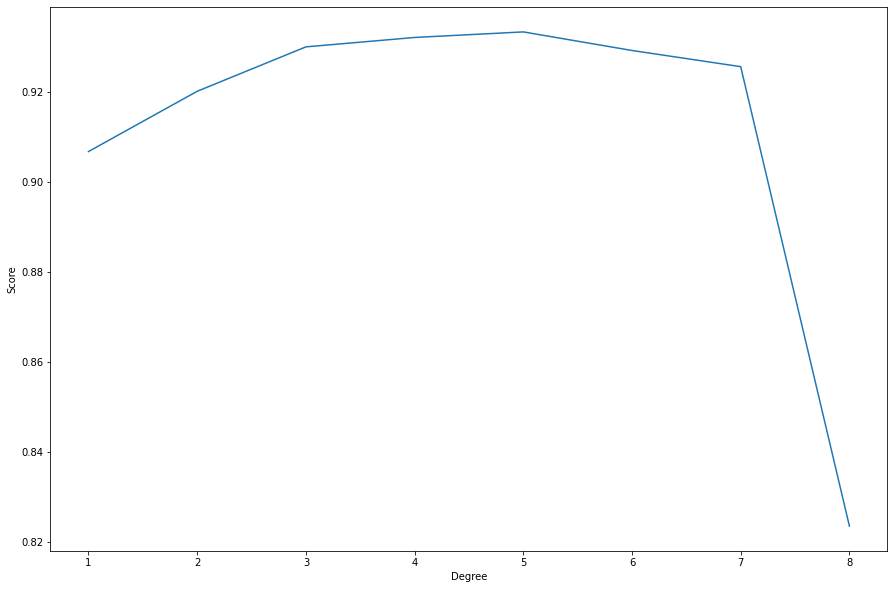

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(result["degrees"], result["score"])
plt.xlabel("Degree")
plt.ylabel("Score")
plt.show()

In [25]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
scores = []
errors = []

for i in range(len(degrees)):
    features = PolynomialFeatures(degrees[i], include_bias=False)
    model = Lasso(alpha=0.01, max_iter=10000)
    pipeline = Pipeline([("Features", features), ("Regression model", model)])
    pipeline.fit(xTrain, yTrain)
    
    prediction = pipeline.predict(xTest)
    scores.append(r2_score(yTest, prediction))
    errors.append(mean_squared_error(yTest, prediction))  

result = pd.DataFrame({"degrees": degrees, "score": scores, "error": errors})
print(result)

c:\users\руслан\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.433e+03, tolerance: 5.131e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\руслан\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.152e+03, tolerance: 5.131e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\руслан\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

    degrees     score     error
0         1  0.906913  1.680384
1         2  0.917693  1.485782
2         3  0.921377  1.419278
3         4  0.923599  1.379165
4         5  0.925192  1.350408
5         6  0.925751  1.340326
6         7  0.926014  1.335577
7         8  0.926762  1.322073
8         9  0.927403  1.310499
9        10  0.927818  1.303006
10       11  0.928017  1.299421
11       12  0.927974  1.300194
12       13  0.927810  1.303157
13       14  0.927723  1.304728
14       15  0.927824  1.302888


c:\users\руслан\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.914e+03, tolerance: 5.131e+00
  model = cd_fast.enet_coordinate_descent(


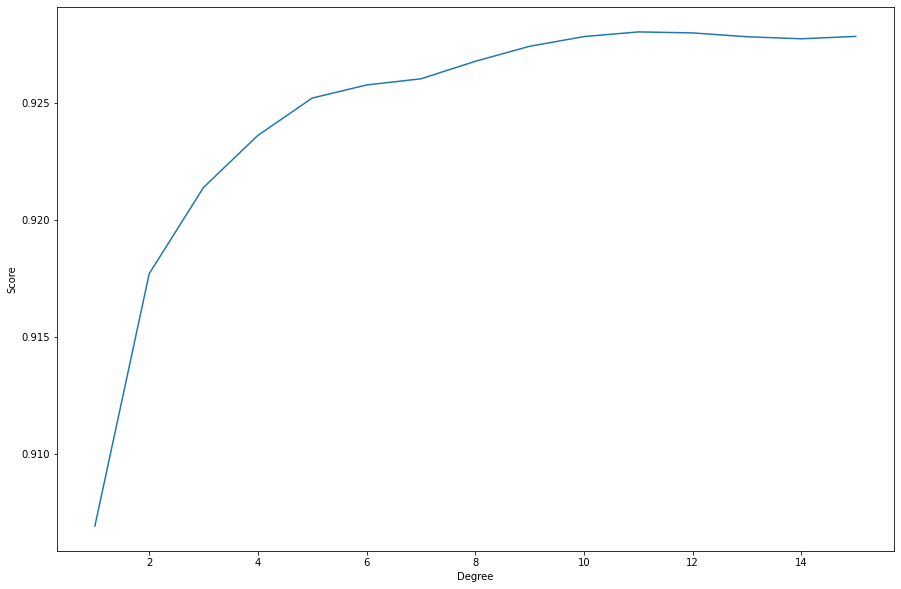

In [26]:
plt.figure(figsize=(15, 10))
plt.plot(result["degrees"], result["score"])
plt.xlabel("Degree")
plt.ylabel("Score")
plt.show()